<a href="https://colab.research.google.com/github/JuanZapa7a/ApredizajeAutomatico/blob/main/Segementin%20weld%20defects%20with%20YOLOv8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
**From OneDrive**

---

In [ ]:
import requests

# Enlace de descarga directa
url = "https://upct-my.sharepoint.com/:u:/g/personal/juan_zapata_upct_es/ESVaFuII1gBMtXrvtmfidIMBvUbFrlsdzhfhoigXJgqwRQ?e=7bksMy"

# Ruta donde se guardará el archivo descargado
output_file = "WeldDatasetOD.zip"

# Descargar el archivo
response = requests.get(url, stream=True)

if response.status_code == 200:
    with open(output_file, 'wb') as f:
        f.write(response.content)
    print(f"Archivo descargado y guardado en {output_file}")
else:
    print("Error al descargar el archivo, código de estado:", response.status_code)


Archivo descargado y guardado en WeldDatasetOD.zip


---
**From Local**

---

In [6]:
import os
import sys

# Check if running in Google Colab
if 'google.colab' in sys.modules:
    from google.colab import files
    uploaded = files.upload()
    file_path = list(uploaded.keys())[0]  # Get the uploaded file's name

    # Load the file in Colab
    with open(file_path, 'r') as f:
        # Process the file content here
        data = f.read()
        # ...

else:
    # Load the file in a regular Python environment
    file_path = 'path/to/your/file.txt'  # Replace with your actual file path
    with open(file_path, 'r') as f:
        # Process the file content here
        data = f.read()
        # ...

# Now you can work with the 'data' variable in both environments



FileNotFoundError: [Errno 2] No such file or directory: 'path/to/your/file.txt'

---
**Zip file?**

---

In [ ]:
!file WeldDataset.zip

WeldDataset.zip: Zip archive data, at least v1.0 to extract, compression method=store


In [ ]:
!file WeldDatasetOD.zip

WeldDatasetOD.zip: HTML document, Unicode text, UTF-8 text, with very long lines (57496), with CRLF line terminators


In [ ]:
!rm -rf datasets
!unzip -q  WeldDataset.zip -d datasets

In [ ]:
# !rm -rf datasets
# !unzip -q archivoOD.zip -d datasets

Archive:  archivoOD.zip
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of archivoOD.zip or
        archivoOD.zip.zip, and cannot find archivoOD.zip.ZIP, period.


---
**Display some images and annotations**

---

In [ ]:
import os

# Ruta al directorio que contiene los archivos de etiquetas
label_dir = 'datasets/WeldDataset/train/labels'

# Crear un conjunto para almacenar las clases únicas
unique_classes = set()

# Iterar sobre todos los archivos en el directorio de etiquetas
for label_file in os.listdir(label_dir):
    if label_file.endswith('.txt'):
        with open(os.path.join(label_dir, label_file), 'r') as f:
            for line in f:
                # Extraer el identificador de clase (el primer número en cada línea)
                class_id = int(line.split()[0])
                # Añadirlo al conjunto de clases únicas
                unique_classes.add(class_id)

# Contar cuántas clases hay
num_classes = len(unique_classes)
print(f'Número de clases únicas: {num_classes}')
print(f'Clases encontradas: {sorted(unique_classes)}')


Número de clases únicas: 5
Clases encontradas: [0, 1, 2, 3, 4]


In [ ]:
!pip install -q matplotlib opencv-python

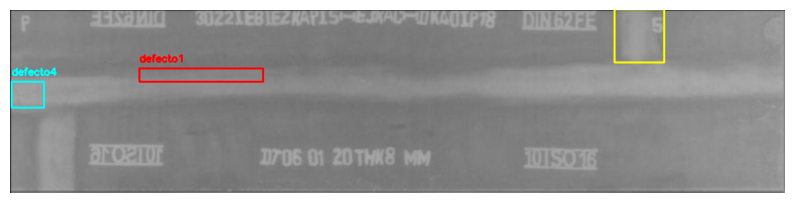

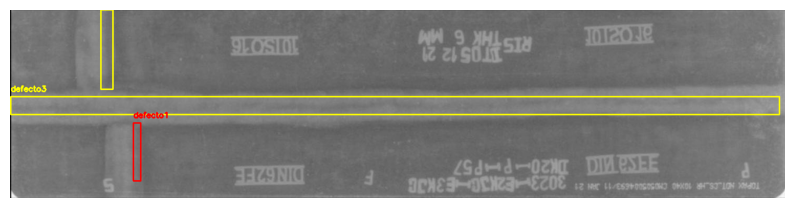

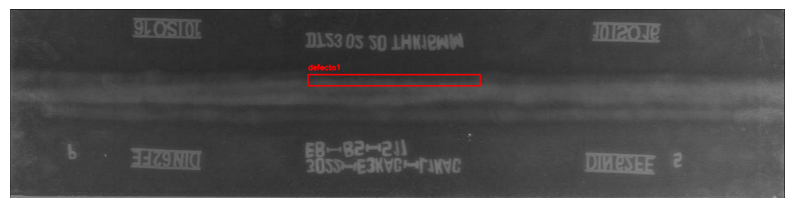

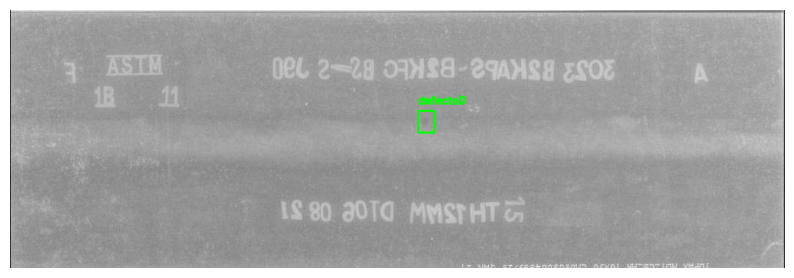

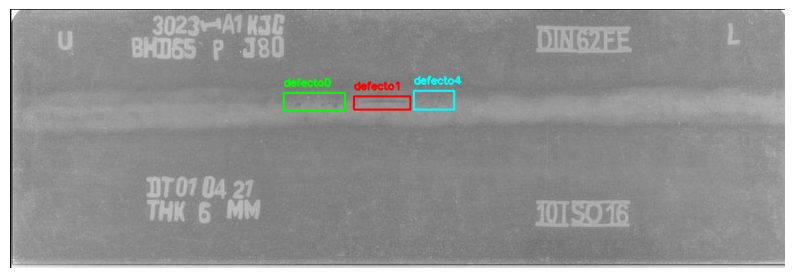

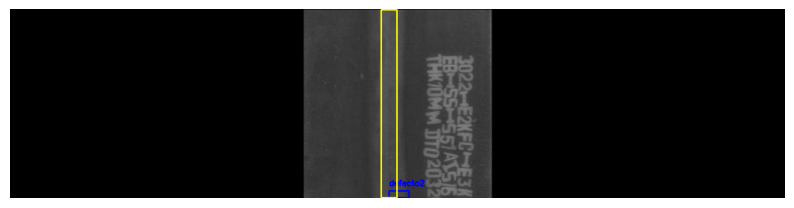

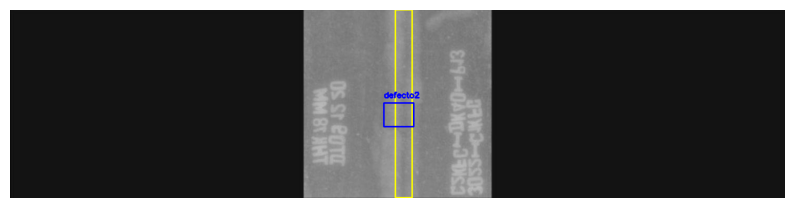

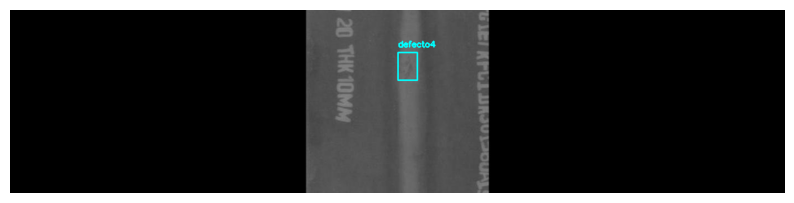

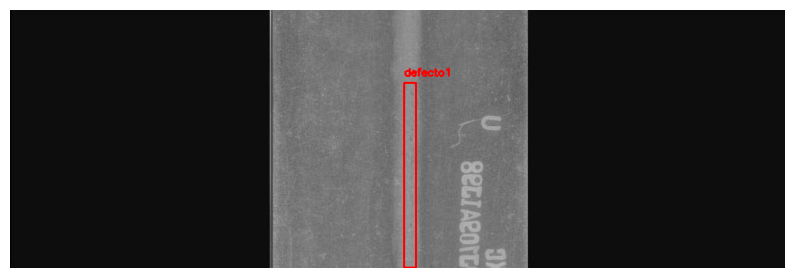

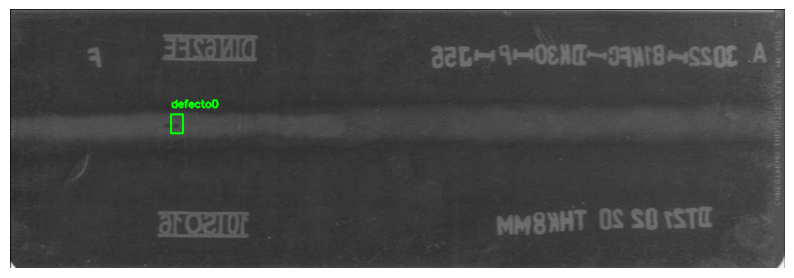

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt

# Configura las rutas
image_dir = 'datasets/WeldDataset/train/images'  # Ruta a las imágenes
label_dir = 'datasets/WeldDataset/train/labels'  # Ruta a las etiquetas

# Configura los colores y clases
class_names = ['defecto0', 'defecto1', 'defecto2', 'defecto3', 'defecto4' ]  # Agrega más clases si es necesario
colors = [(0, 255, 0), (255, 0, 0), (0, 0 , 255), (255, 255, 0), (0, 255, 255) ]  # Agrega colores correspondientes a las clases

# Función para visualizar las imágenes con etiquetas
def visualize_images_with_labels(image_dir, label_dir, class_names, colors, num_images=5):
    image_files = [f for f in os.listdir(image_dir) if f.endswith('.jpg')]

    for i, image_file in enumerate(image_files[:num_images]):
        # Leer la imagen
        img_path = os.path.join(image_dir, image_file)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convertir de BGR (OpenCV) a RGB (matplotlib)

        # Leer el archivo de etiquetas correspondiente
        label_path = os.path.join(label_dir, image_file.replace('.jpg', '.txt'))
        with open(label_path, 'r') as f:
            labels = f.readlines()

        # Dibujar las etiquetas en la imagen
        h, w, _ = img.shape
        for label in labels:
            class_id, x_center, y_center, width, height = map(float, label.strip().split())
            x_center, y_center, width, height = x_center * w, y_center * h, width * w, height * h

            # Convertir a coordenadas de esquina (xmin, ymin) y (xmax, ymax)
            xmin = int(x_center - width / 2)
            ymin = int(y_center - height / 2)
            xmax = int(x_center + width / 2)
            ymax = int(y_center + height / 2)

            # Asegúrate de que class_id esté dentro del rango válido
            if int(class_id) < len(colors):
                # Dibujar el rectángulo y el nombre de la clase
                cv2.rectangle(img, (xmin, ymin), (xmax, ymax), colors[int(class_id)], 2)
                cv2.putText(img, class_names[int(class_id)], (xmin, ymin - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, colors[int(class_id)], 2)
            else:
                print(f"Warning: Class ID {int(class_id)} out of range for image {image_file}. Skipping this label.")

        # Mostrar la imagen
        plt.figure(figsize=(10, 10))
        plt.imshow(img)
        plt.axis('off')
        plt.show()

# Visualiza las primeras 5 imágenes con etiquetas
visualize_images_with_labels(image_dir, label_dir, class_names, colors, num_images=10)